## Setup: Read in data, store in array-of-arrays

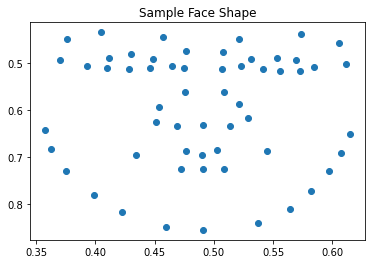

(2, 33, 58)


In [6]:
import linecache
import numpy as np
import pathlib
from matplotlib import pyplot as plt

#Where the files (XY-1.asf) for the shape coordinates are stored
facepath = "m_faces\\"

count = 0

for path in pathlib.Path(facepath).iterdir():
    
    if path.is_file():
        count += 1

#print(count)
f = "m_faces\\01-1m.asf"
length = int(linecache.getline(f, 10))


x_mtrx = np.empty([length, count])
y_mtrx = np.empty([length, count])

k = 0

#For every file in the directory
for path in pathlib.Path(facepath).iterdir():
    

    if path.is_file():
        length = int(linecache.getline(str(path), 10))
        i = 17
        j = i
        
        
        #For every coordinate pair in the file
        while(j < i + length):

            #Put the X and Y coords into the matrices
            line = linecache.getline(str(path), j).split()
            x_mtrx[(i-j), k] = line[2]
            y_mtrx[(i-j), k] = line[3]
            j += 1
    
    k+=1

#print(x_mtrx, y_mtrx)


#Transpose matrices for consistency in matrix-of-matrices
x_mtrx = x_mtrx.transpose()
y_mtrx = y_mtrx.transpose()
"""
plt.xlim(0, 1)
plt.ylim(0, 1)
"""
#Invert y-axis to properly display faces
plt.gca().invert_yaxis()

mtrx = np.array([x_mtrx, y_mtrx])
#print(mtrx.)

plt.scatter(mtrx[0][0], mtrx[1][0])
plt.title("Sample Face Shape")
plt.show()

print(mtrx.shape)

## Get the average face shape

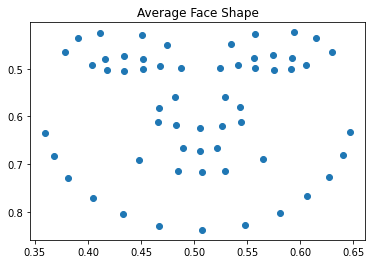

In [7]:
x_avg = np.empty([length, 1])
y_avg = np.empty([length, 1])

for j in range(58):
    
    x_avg[j] = 0
    y_avg[j] = 0
    
    for i in range(33):
        
        #print(mtrx[0][i][j])
        x_avg[j] += mtrx[0][i][j]
        y_avg[j] += mtrx[1][i][j]
    
    #print(x_avg[j])
    x_avg[j] = x_avg[j]/33.0
    #print(x_avg[j])
    
    #print(y_avg[j])
    y_avg[j] = y_avg[j]/33.0
    #print(y_avg[j])
    
mtrx_avg = np.array([x_avg, y_avg])

#print(mtrx_avg)

#Invert y-axis to properly display faces
plt.gca().invert_yaxis()

plt.scatter((mtrx_avg[0]), (mtrx_avg[1]))
plt.title("Average Face Shape")
plt.show()
#print(mtrx_avg.shape)

## Shape Interpolation

In [14]:
#Interpolating the first 2 face shapes in the input data
alpha = 0.0
mtrx_interpolate = np.copy(mtrx_avg)
while(alpha <= 1.0):
    for n in range(length):
        
        mtrx_interpolate[0][n] = ((1.0 - alpha) * mtrx[0][0][n]) + (alpha * mtrx[0][1][n])
        mtrx_interpolate[1][n] = ((1.0 - alpha) * mtrx[1][0][n]) + (alpha * mtrx[1][1][n])
    
    plt.xlim(0.3, 0.7)
    plt.ylim(0.3, 0.9)
    #Invert y-axis to properly display faces
    plt.gca().invert_yaxis()

    
    plt.scatter((mtrx_interpolate[0]), (mtrx_interpolate[1]))
    plt.title("Interpolating Face Shape")
    #plt.show()

    if(alpha == 0.0):
        plt.savefig("interp\\0.png")
    if(alpha == 0.2):
        plt.savefig("interp\\1.png")
    if(alpha == 0.4):
        plt.savefig("interp\\2.png")
    if(alpha == 0.6):
        plt.savefig("interp\\3.png")
    if(alpha == 0.8):
        plt.savefig("interp\\4.png")
    if(alpha == 1.0):
        plt.savefig("interp\\5.png")
    
    plt.clf()
    alpha += 0.2



<Figure size 432x288 with 0 Axes>

## Triangluation

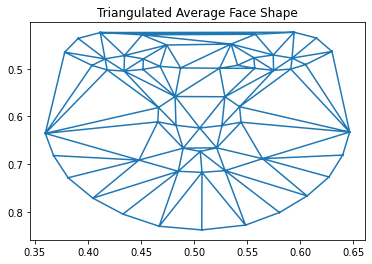

In [9]:
from scipy.spatial import Delaunay

mtrx_avg_2 = np.empty([length, 2])
x_avg_2 = np.empty([length])
y_avg_2 = np.empty([length])

for i in range(length):
    mtrx_avg_2[i][0] = mtrx_avg[0][i]
    x_avg_2[i] = mtrx_avg[0][i]
    mtrx_avg_2[i][1] = mtrx_avg[1][i]
    y_avg_2[i] = mtrx_avg[1][i]

tri_avg = Delaunay(mtrx_avg_2)

#Invert y-axis to properly display faces
plt.gca().invert_yaxis()

plt.triplot(x_avg_2, y_avg_2, tri_avg.simplices)
plt.title("Triangulated Average Face Shape")
plt.show()


## Transfer Average Triangulation

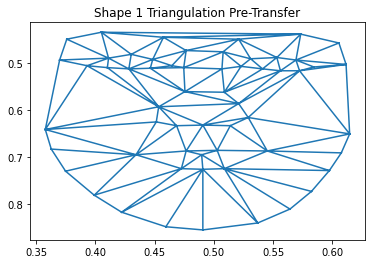

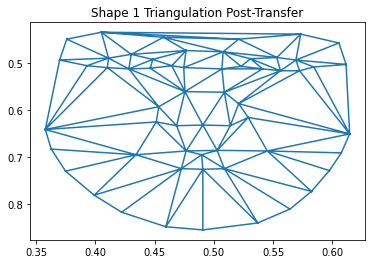

In [10]:
#Get triangulation of some shape, then overwrite its edges(simplices) with those of the average
x1 = np.empty([length])
y1 = np.empty([length])
m1 = np.empty([length, 2])

for i in range(length):

    x1[i] = x_mtrx[0][i]
    m1[i][0] = x_mtrx[0][i]
    y1[i] = y_mtrx[0][i]
    m1[i][1] = y_mtrx[0][i]

tri_1 = Delaunay(m1)

#Invert y-axis to properly display faces
plt.gca().invert_yaxis()

plt.triplot(x1, y1, tri_1.simplices)
plt.title("Shape 1 Triangulation Pre-Transfer")
plt.show()

tri_1.simplices = tri_avg.simplices

#Invert y-axis to properly display faces
plt.gca().invert_yaxis()

plt.triplot(x1, y1, tri_1.simplices)
plt.title("Shape 1 Triangulation Post-Transfer")
plt.show()
